### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Load Dataset

In [2]:
data = pd.read_csv("oxland_windfarm.csv")

In [3]:
data.shape

(70, 10)

### Data Exploration

In [4]:
data.head()

,Timestamp,Sensor 1 (Temperature C),Sensor 2 (Pressure KPa),Wind speed (m/s),Vibration (Hz),n (RPM),Power Output (MW),Ambient Temperature (deg C),Stop Event,Stop Reason
0,8/1/2024 8:00,85,101,4.5,1500,45,30,10,Scheduled Stop,Routine Maintenance
1,8/1/2024 12:00,92,110,5.2,1450,47,32,25,Emergency Stop,High Wind Speed
2,8/2/2024 15:00,80,98,4.0,1520,46,28,8,Normal Operation,NaN
3,8/3/2024 9:00,88,105,4.7,1480,44,29,12,Scheduled Stop,Lubrication System Check
4,8/3/2024 14:00,95,115,5.5,1420,43,35,30,Failure,Bearing Overheating


In [5]:
data.shape

(70, 10)

In [6]:
data.dtypes

Timestamp                       object
Sensor 1 (Temperature C)         int64
Sensor 2 (Pressure KPa)          int64
Wind speed (m/s)               float64
Vibration (Hz)                   int64
n (RPM)                          int64
Power Output (MW)                int64
Ambient Temperature (deg C)      int64
Stop Event                      object
Stop Reason                     object
dtype: object

In [7]:
data.columns

Index(['Timestamp', 'Sensor 1 (Temperature C)', 'Sensor 2 (Pressure KPa)',
       'Wind speed (m/s)', 'Vibration (Hz)', 'n (RPM)', 'Power Output (MW)',
       'Ambient Temperature (deg C)', 'Stop Event', 'Stop Reason'],
      dtype='object')

In [8]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [9]:
data.dtypes

Timestamp                      datetime64[ns]
Sensor 1 (Temperature C)                int64
Sensor 2 (Pressure KPa)                 int64
Wind speed (m/s)                      float64
Vibration (Hz)                          int64
n (RPM)                                 int64
Power Output (MW)                       int64
Ambient Temperature (deg C)             int64
Stop Event                             object
Stop Reason                            object
dtype: object

### Data Cleaning

In [10]:
data.isnull().sum()

Timestamp                       0
Sensor 1 (Temperature C)        0
Sensor 2 (Pressure KPa)         0
Wind speed (m/s)                0
Vibration (Hz)                  0
n (RPM)                         0
Power Output (MW)               0
Ambient Temperature (deg C)     0
Stop Event                      0
Stop Reason                    25
dtype: int64

In [11]:
data['Stop Reason'] = data['Stop Reason'].fillna('Operational Protocol')

In [12]:
data.isnull().sum()

Timestamp                      0
Sensor 1 (Temperature C)       0
Sensor 2 (Pressure KPa)        0
Wind speed (m/s)               0
Vibration (Hz)                 0
n (RPM)                        0
Power Output (MW)              0
Ambient Temperature (deg C)    0
Stop Event                     0
Stop Reason                    0
dtype: int64

In [13]:
data.at[2, 'Stop Event'] = 'Scheduled Stop'
data.at[2, 'Stop Reason'] = 'Blade Inspection'
data.at[2, 'Stop Event-Reason'] = 'Scheduled Stop - Blade Inspection'
data.at[2, 'Stop Event-Reason-Catg'] = 8

In [14]:
data.duplicated('Stop Event')

0     False
1     False
2      True
3      True
4     False
      ...  
65     True
66     True
67     True
68     True
69     True
Length: 70, dtype: bool

In [15]:
data.describe

<bound method NDFrame.describe of              Timestamp  Sensor 1 (Temperature C)  Sensor 2 (Pressure KPa)  \
0  2024-08-01 08:00:00                        85                      101   
1  2024-08-01 12:00:00                        92                      110   
2  2024-08-02 15:00:00                        80                       98   
3  2024-08-03 09:00:00                        88                      105   
4  2024-08-03 14:00:00                        95                      115   
..                 ...                       ...                      ...   
65 2024-09-27 09:00:00                        92                      113   
66 2024-09-28 08:00:00                        85                      104   
67 2024-09-29 10:30:00                        96                      119   
68 2024-09-30 11:00:00                        84                      103   
69 2024-10-01 08:00:00                        89                      110   

    Wind speed (m/s)  Vibration (Hz)  n (

### Data Visualization

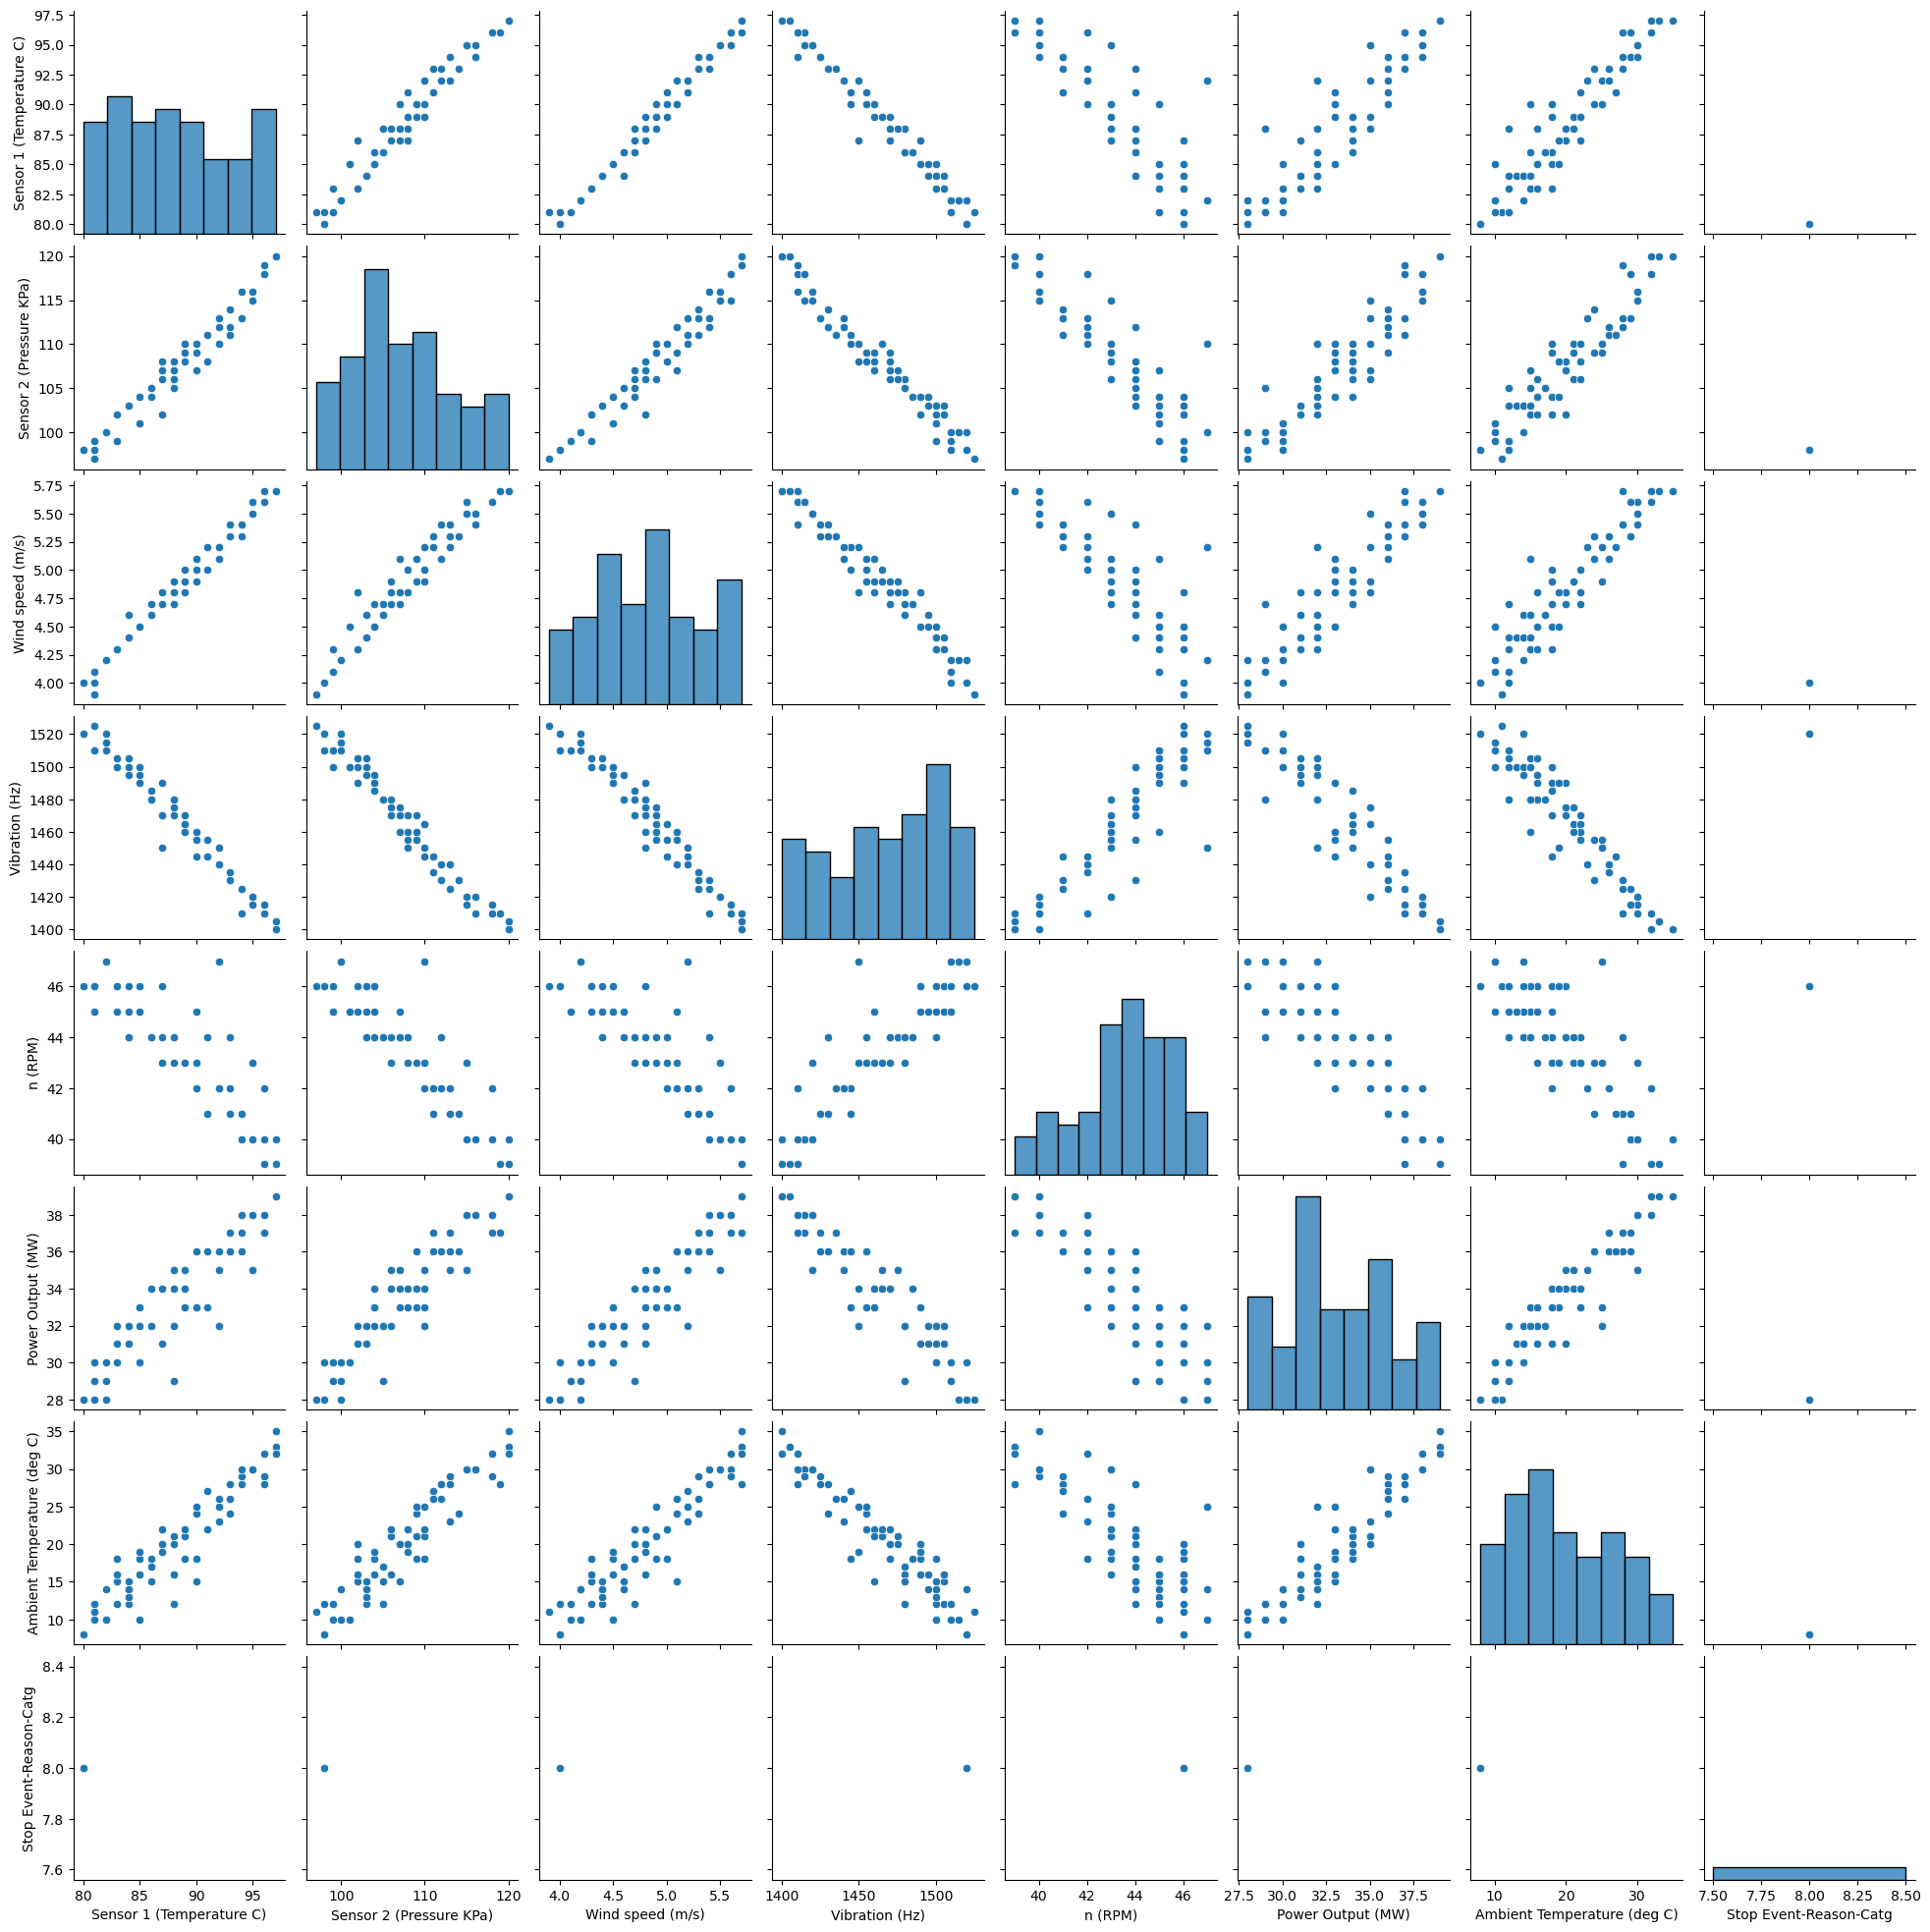

In [16]:
sb.pairplot(data=data)

In [17]:
data.columns

Index(['Timestamp', 'Sensor 1 (Temperature C)', 'Sensor 2 (Pressure KPa)',
       'Wind speed (m/s)', 'Vibration (Hz)', 'n (RPM)', 'Power Output (MW)',
       'Ambient Temperature (deg C)', 'Stop Event', 'Stop Reason',
       'Stop Event-Reason', 'Stop Event-Reason-Catg'],
      dtype='object')

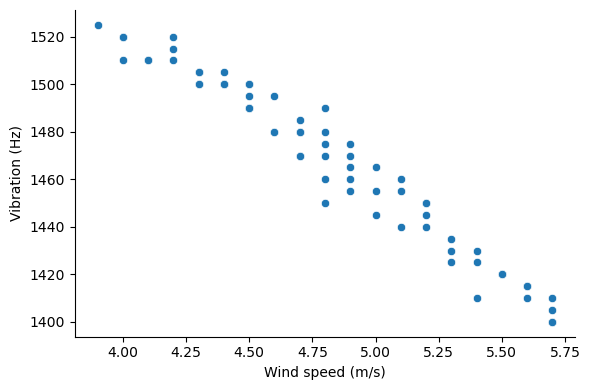

In [18]:
sb.relplot(x= 'Wind speed (m/s)', y= 'Vibration (Hz)', kind='scatter', data=data, height=4, aspect=1.5)

<Axes: xlabel='Wind speed (m/s)', ylabel='Power Output (MW)'>

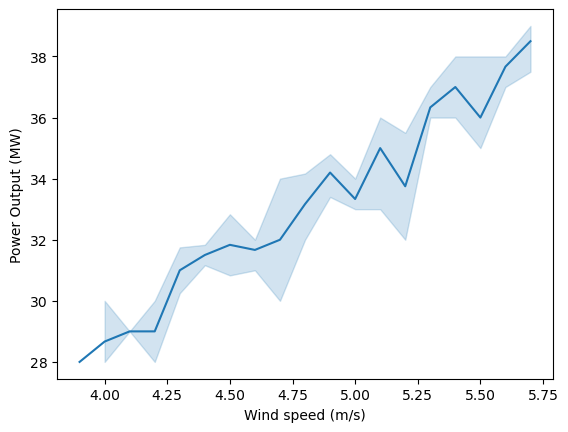

In [19]:
sb.lineplot(x= 'Wind speed (m/s)', y= 'Power Output (MW)', data=data)

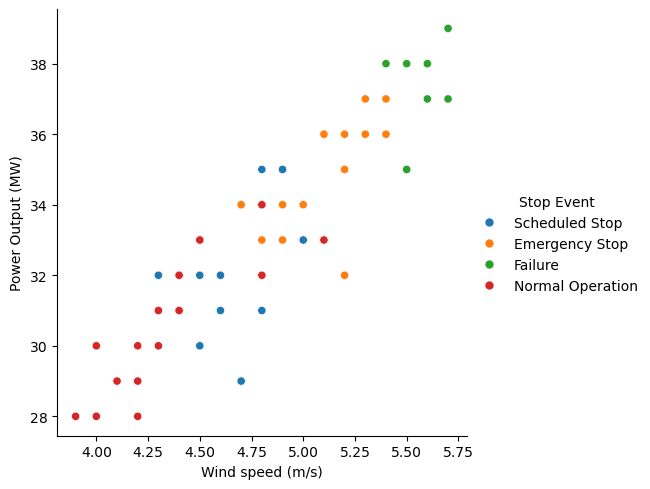

In [20]:
s_plot = sb.relplot(x= 'Wind speed (m/s)', y= 'Power Output (MW)', hue = 'Stop Event', data=data)
sb.move_legend(s_plot, "center right")

<Axes: xlabel='Vibration (Hz)', ylabel='Power Output (MW)'>

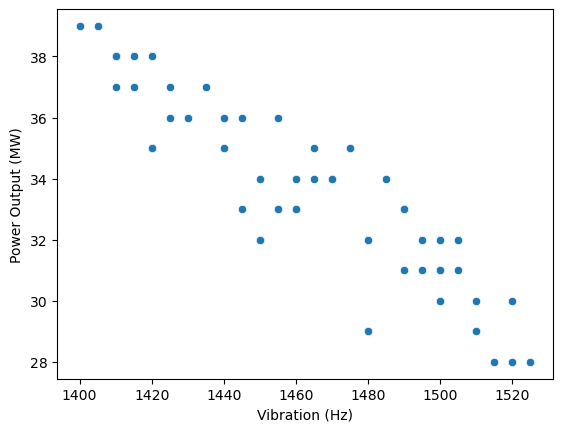

In [21]:
sb.scatterplot(x= 'Vibration (Hz)', y= 'Power Output (MW)', data=data)

In [22]:
data.columns

Index(['Timestamp', 'Sensor 1 (Temperature C)', 'Sensor 2 (Pressure KPa)',
       'Wind speed (m/s)', 'Vibration (Hz)', 'n (RPM)', 'Power Output (MW)',
       'Ambient Temperature (deg C)', 'Stop Event', 'Stop Reason',
       'Stop Event-Reason', 'Stop Event-Reason-Catg'],
      dtype='object')

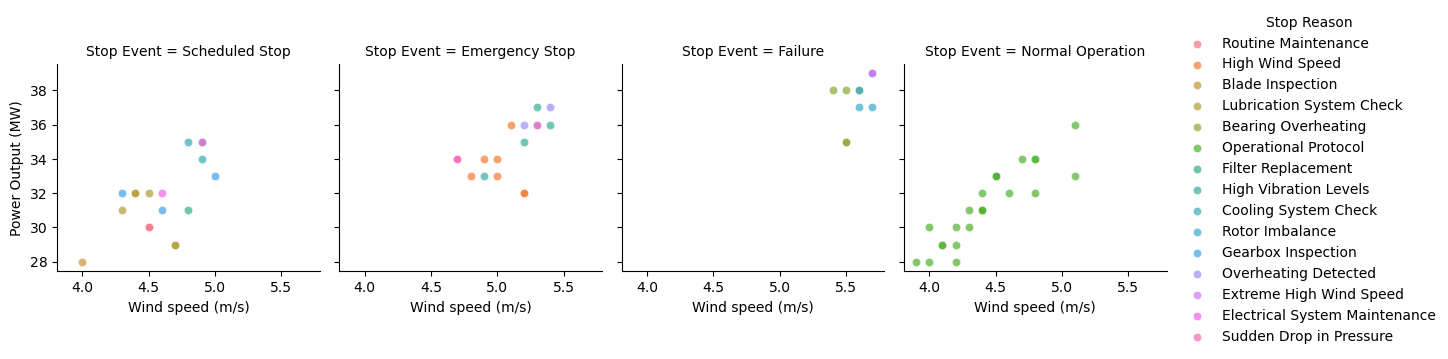

In [23]:
view_plot = sb.FacetGrid(data, col='Stop Event', hue='Stop Reason')
view_plot.map(sb.scatterplot, 'Wind speed (m/s)', 'Power Output (MW)', alpha=.7)
view_plot.add_legend()

### Feature Engineering

In [24]:
data['Stop Event-Reason'] = data['Stop Event'].astype('str')+ " - " + data['Stop Reason']

In [25]:
data.head(2)

,Timestamp,Sensor 1 (Temperature C),Sensor 2 (Pressure KPa),Wind speed (m/s),Vibration (Hz),n (RPM),Power Output (MW),Ambient Temperature (deg C),Stop Event,Stop Reason,Stop Event-Reason,Stop Event-Reason-Catg
0,2024-08-01 08:00:00,85,101,4.5,1500,45,30,10,Scheduled Stop,Routine Maintenance,Scheduled Stop - Routine Maintenance,NaN
1,2024-08-01 12:00:00,92,110,5.2,1450,47,32,25,Emergency Stop,High Wind Speed,Emergency Stop - High Wind Speed,NaN


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Stop Event-Reason-Catg'] = label_encoder.fit_transform(data['Stop Event-Reason'])
data.head(2)

,Timestamp,Sensor 1 (Temperature C),Sensor 2 (Pressure KPa),Wind speed (m/s),Vibration (Hz),n (RPM),Power Output (MW),Ambient Temperature (deg C),Stop Event,Stop Reason,Stop Event-Reason,Stop Event-Reason-Catg
0,2024-08-01 08:00:00,85,101,4.5,1500,45,30,10,Scheduled Stop,Routine Maintenance,Scheduled Stop - Routine Maintenance,14
1,2024-08-01 12:00:00,92,110,5.2,1450,47,32,25,Emergency Stop,High Wind Speed,Emergency Stop - High Wind Speed,1


In [27]:
data['Stop Event-Reason-Catg'] = data['Stop Event-Reason'].astype('category').cat.codes

In [28]:
data.columns

Index(['Timestamp', 'Sensor 1 (Temperature C)', 'Sensor 2 (Pressure KPa)',
       'Wind speed (m/s)', 'Vibration (Hz)', 'n (RPM)', 'Power Output (MW)',
       'Ambient Temperature (deg C)', 'Stop Event', 'Stop Reason',
       'Stop Event-Reason', 'Stop Event-Reason-Catg'],
      dtype='object')

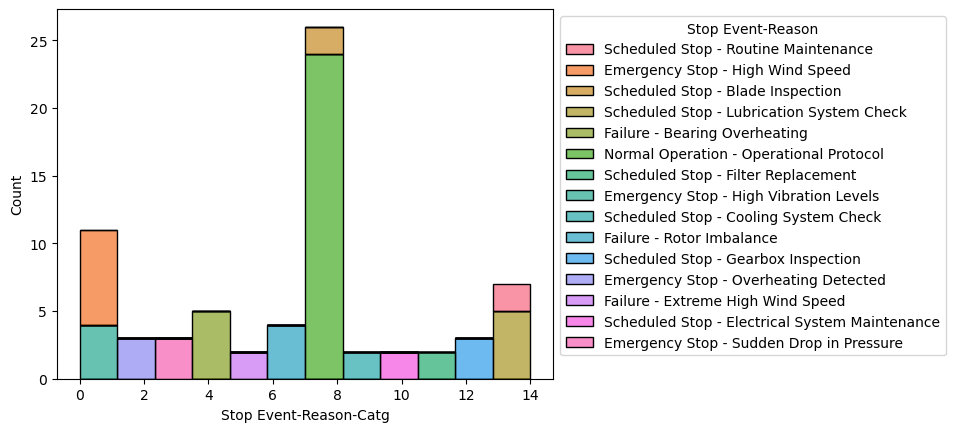

In [29]:
cat_plot = sb.histplot(data=data, x='Stop Event-Reason-Catg', binwidth = 1.2, hue='Stop Event-Reason', multiple ='stack')
sb.move_legend(cat_plot, "upper left", bbox_to_anchor=(1, 1))

### Correlation Analysis

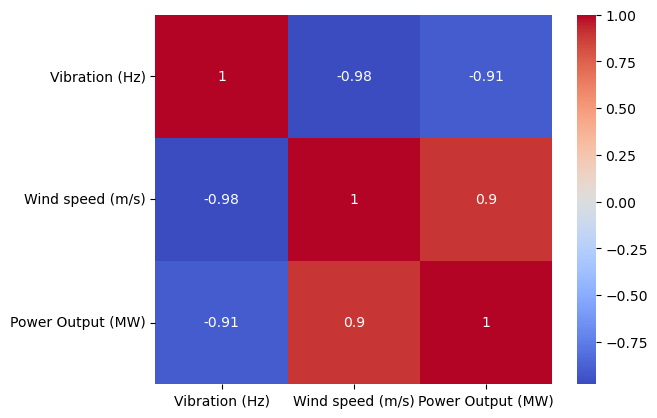

In [30]:
corr_interest = ['Vibration (Hz)', 'Wind speed (m/s)', 'Power Output (MW)']
corr = data[corr_interest].corr()
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [31]:
data.columns

Index(['Timestamp', 'Sensor 1 (Temperature C)', 'Sensor 2 (Pressure KPa)',
       'Wind speed (m/s)', 'Vibration (Hz)', 'n (RPM)', 'Power Output (MW)',
       'Ambient Temperature (deg C)', 'Stop Event', 'Stop Reason',
       'Stop Event-Reason', 'Stop Event-Reason-Catg'],
      dtype='object')

### Further Data Preprocessing

In [32]:
X = data.drop(['Timestamp', 'Stop Event-Reason-Catg', 'Stop Event', 'Stop Reason', 'Stop Event-Reason'], axis=1)
Y = data[['Stop Event-Reason-Catg']]

In [33]:
X.head()

,Sensor 1 (Temperature C),Sensor 2 (Pressure KPa),Wind speed (m/s),Vibration (Hz),n (RPM),Power Output (MW),Ambient Temperature (deg C)
0,85,101,4.5,1500,45,30,10
1,92,110,5.2,1450,47,32,25
2,80,98,4.0,1520,46,28,8
3,88,105,4.7,1480,44,29,12
4,95,115,5.5,1420,43,35,30


In [41]:
columns = list(data.columns)

categoric_columns = []
numeric_columns = []

# Iterate through the column names with their indices
for idx, col in enumerate(columns):
    if 1 <= idx < 8:  # Columns 2 to 7
        numeric_columns.append(col)
    elif 8 <= idx < len(columns) - 2:  # Remaining columns except the last one
        categoric_columns.append(col)

print('Numerical features: ',numeric_columns)
print('Categorical features: ',categoric_columns)

Numerical features:  ['Sensor 1 (Temperature C)', 'Sensor 2 (Pressure KPa)', 'Wind speed (m/s)', 'Vibration (Hz)', 'n (RPM)', 'Power Output (MW)', 'Ambient Temperature (deg C)']
Categorical features:  ['Stop Event', 'Stop Reason']


<Axes: ylabel='Count'>

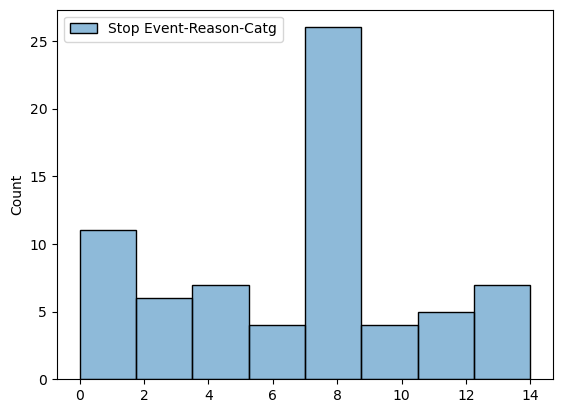

In [42]:
sb.histplot(data = Y)

### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

X_scaled = StandardScaler.fit_transform(X)
X_scaled_data = pd.DataFrame(X_scaled, columns=numeric_columns)
X_scaled_data.head()

,Sensor 1 (Temperature C),Sensor 2 (Pressure KPa),Wind speed (m/s),Vibration (Hz),n (RPM),Power Output (MW),Ambient Temperature (deg C)
0,-0.648369,-1.028931,-0.643936,0.901269,0.611179,-1.071657,-1.382990
1,0.802320,0.454425,0.777364,-0.522858,1.551454,-0.398868,0.749373
2,-1.684575,-1.523382,-1.659149,1.470920,1.081316,-1.744447,-1.667305
3,-0.026645,-0.369662,-0.237850,0.331618,0.141041,-1.408052,-1.098675
4,1.424043,1.278511,1.386492,-1.377334,-0.329096,0.610316,1.460161


### ML Modelling

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, Y, test_size=0.25, random_state=42, stratify=Y)

In [45]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (52, 7)
X_test shape: (18, 7)
y_train shape: (52, 1)
y_test shape: (18, 1)


#### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

RFC_Model = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
RFC_Model.fit(X_train, y_train)
event_predict = RFC_Model.predict(X_test)
RFC_Model_Accuracy = accuracy_score(y_test, event_predict)
RFC_Model_Report = classification_report(y_test, event_predict, zero_division=1)
RFC_Model_Matrix = confusion_matrix(y_test, event_predict)

print(f"Accuracy: {RFC_Model_Accuracy}")
print(f"Classification Report: \n", RFC_Model_Report)
print(f"Confusion Matrix: \n", RFC_Model_Matrix)

C:\Users\00090206\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7777777777777778
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.67      1.00      0.80         6
           8       1.00      0.00      0.00         1
          12       1.00      0.00      0.00         1
          13       1.00      0.00      0.00         1
          14       1.00      1.00      1.00         1

    accuracy                           0.78        18
   macro avg       0.94      0.67      0.63        18
weighted avg       0.85      0.78      0.69        18

Confusion Matrix: 
 [[0 1 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0

#### Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC
SVC_model = SVC(kernel='linear', random_state=42)
SVC_model.fit(X_train, y_train.values.ravel())
event_predict_SVC = SVC_model.predict(X_test)
SVC_accuracy = accuracy_score(y_test, event_predict_SVC)
SVC_Model_Report = classification_report(y_test, event_predict)
SVC_Model_Matrix = confusion_matrix(y_test, event_predict)


print(f"Accuracy: {SVC_accuracy}")
print(f"Classification Report: \n", SVC_Model_Report)
print(f"Confusion Matrix: \n", SVC_Model_Matrix)

Accuracy: 0.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.67      1.00      0.80         6
           8       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1

    accuracy                           0.78        18
   macro avg       0.61      0.67      0.63        18
weighted avg       0.63      0.78      0.69        18

Confusion Matrix: 
 [[0 1 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 

C:\Users\00090206\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\00090206\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\00090206\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

##### Saving Preprocessing Objects

In [56]:
import joblib

joblib.dump(StandardScaler, 'standard_scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(RFC_Model, 'random_forest_model.pkl')
joblib.dump(SVC_model, 'svm_model.pkl')

['svm_model.pkl']

##### Preprocessing function

In [49]:
X.columns

Index(['Sensor 1 (Temperature C)', 'Sensor 2 (Pressure KPa)',
       'Wind speed (m/s)', 'Vibration (Hz)', 'n (RPM)', 'Power Output (MW)',
       'Ambient Temperature (deg C)'],
      dtype='object')

In [50]:
from sklearn.pipeline import Pipeline

rf_model = joblib.load('random_forest_model.pkl')
svc_model = joblib.load('svm_model.pkl')

def preprocess_data(data):
    StandardScaler = joblib.load('standard_scaler.pkl')

    input_columns = ['Sensor 1 (Temperature C)', 'Sensor 2 (Pressure KPa)',
       'Wind speed (m/s)', 'Vibration (Hz)', 'n (RPM)', 'Power Output (MW)',
       'Ambient Temperature (deg C)']

    data[input_columns] = StandardScaler.transform(data[input_columns])

    return data

In [52]:
input_data = pd.DataFrame({
    'Sensor 1 (Temperature C)': [70], 
    'Sensor 2 (Pressure KPa)': [5],
    'Wind speed (m/s)': [4],
    'Vibration (Hz)': [2],  
    'n (RPM)': [100],
    'Power Output (MW)': [3],          
    'Ambient Temperature (deg C)': [25]               
})

prepare_data = preprocess_data(input_data)

valid_predict = rf_model.predict(input_data)
predicted_label = label_encoder.inverse_transform(valid_predict)

print(f"Predicted Stop Event-Reason Category: {valid_predict[0]}")
print(f"Predicted original label: {predicted_label[0]}")

Predicted Stop Event-Reason Category: 7
Predicted original label: Normal Operation - Operational Protocol


In [5]:
import pandas as pd
input_data = pd.DataFrame({
    'Sensor 1 (Temperature C)': [70], 
    'Sensor 2 (Pressure KPa)': [5],
    'Wind speed (m/s)': [4],
    'Vibration (Hz)': [2],  
    'n (RPM)': [100],
    'Power Output (MW)': [3],          
    'Ambient Temperature (deg C)': [25]               
})
input_data

,Sensor 1 (Temperature C),Sensor 2 (Pressure KPa),Wind speed (m/s),Vibration (Hz),n (RPM),Power Output (MW),Ambient Temperature (deg C)
0,70,5,4,2,100,3,25


In [55]:



from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.DataFrame({'category': ['a', 'b', 'c', 'd']})
le = LabelEncoder()
le.fit(data.category)
encoded = le.transform(data.category)
le.inverse_transform(encoded)
encoded

array([0, 1, 2, 3])